# Install Libraries

In [1]:
!pip install tensorflow pandas numpy sklearn
!pip install pandas scikit-learn
!pip install lime shap

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 24.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=48c0b9d6f3c195dd307428b265676d82e558382b80b276441dedaf4619da5d7a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import timedelta
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.metrics import AUC, Precision, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pandas.tseries.offsets import DateOffset
from sklearn import metrics


# Read Preprocessed Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
tpr_DT = np.load('tpr_fold6.npy')
fpr_DT = np.load('fpr_fold6.npy')
roc_auc_DT = np.load('roc_auc_fold6.npy')

tpr_XGB = np.load('tpr_fold6_XGB.npy')
fpr_XGB = np.load('fpr_fold6_XGB.npy')
roc_auc_XGB = np.load('roc_auc_fold6_XGB.npy')

tpr_RF = np.load('tpr_fold6_RF.npy')
fpr_RF = np.load('fpr_fold6_RF.npy')
roc_auc_RF = np.load('roc_auc_fold6_RF.npy')

tpr_GBM = np.load('tpr_fold6_GBM.npy')
fpr_GBM = np.load('fpr_fold6_GBM.npy')
roc_auc_GBM = np.load('roc_auc_fold6_GBM.npy')

tpr_RNN = np.load('tpr_fold6_RNN.npy')
fpr_RNN = np.load('fpr_fold6_RNN.npy')
roc_auc_RNN = np.load('roc_auc_fold6_RNN.npy')

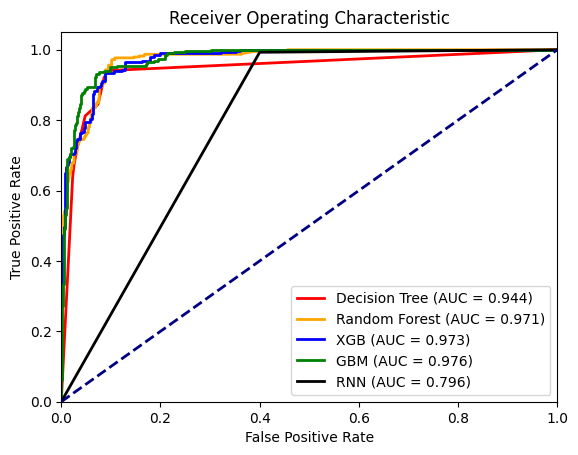

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot both ROC curves
plt.figure()
lw = 2
plt.plot(fpr_DT, tpr_DT, color='red',
         lw=lw, label='Decision Tree (AUC = %0.3f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='orange',
         lw=lw, label='Random Forest (AUC = %0.3f)' % roc_auc_RF)
plt.plot(fpr_XGB, tpr_XGB, color='blue',
         lw=lw, label='XGB (AUC = %0.3f)' % roc_auc_XGB)
plt.plot(fpr_GBM, tpr_GBM, color='green',
         lw=lw, label='GBM (AUC = %0.3f)' % roc_auc_GBM)
plt.plot(fpr_RNN, tpr_RNN, color='black',
         lw=lw, label='RNN (AUC = %0.3f)' % roc_auc_RNN)

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Add labels and a legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()
